## Bike rental prediction


#### Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

#### University of Porto compiled this data into a CSV file, which we'll be working with in this project. The file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day. The data csn be downloaded from the University of California, Irvine's website.

#### In this project, we'll try to predict the total number of bikes people rented in a given hour. To accomplish this, we'll create a few different machine learning models and evaluate their performance.

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#read the data
bike_rentals = pd.read_csv('bike_rental_hour.csv')
bike_rentals.head(24)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


#### Here are the descriptions for the relevant columns:

**instant** - A unique sequential ID number for each row

**dteday** - The date of the rentals

**season** - The season in which the rentals occurred

**yr** - The year the rentals occurred

**mnth** - The month the rentals occurred

**hr** - The hour the rentals occurred

**holiday** - Whether or not the day was a holiday

**weekday** - The day of the week (as a number, 0 to 7)

**workingday** - Whether or not the day was a working day

**weathersit** - The weather (as a categorical variable)

**temp** - The temperature, on a 0-1 scale

**atemp** - The adjusted temperature

**hum** - The humidity, on a 0-1 scale

**windspeed** - The wind speed, on a 0-1 scale

**casual** - The number of casual riders (people who hadn't previously signed up with the bike sharing program)

**registered** - The number of registered riders (people who had already signed up)

**cnt** - The total number of bike rentals (casual + registered)

### Let's do some exploratory and visual data analysis

In [4]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [19]:
bike_rentals.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [37]:
hour = bike_rentals.groupby('hr').mean().reset_index()
day = bike_rentals.groupby('weekday').mean().reset_index()
month = bike_rentals.groupby('mnth').mean().reset_index()
weather = bike_rentals.groupby('weathersit').mean().reset_index()

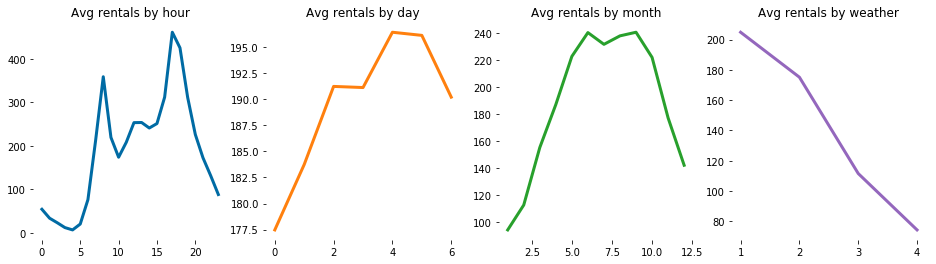

In [43]:
fig = plt.figure(figsize=(16,4))
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
cb_green = (40/255, 160/255, 44/255)
cb_purple = (148/255, 103/255, 189/255)
direc = ['right', 'left', 'top', 'bottom']

ax = fig.add_subplot(1,4,1)
ax.plot(hour['hr'], hour['cnt'], c=cb_dark_blue, linewidth=3)
ax.set_title('Avg rentals by hour')

ax1 = fig.add_subplot(1,4,2)
ax1.plot(day['weekday'], day['cnt'], c=cb_orange, linewidth=3)
ax1.set_title('Avg rentals by day')

ax2 = fig.add_subplot(1,4,3)
ax2.plot(month['mnth'], month['cnt'], c=cb_green, linewidth=3)
ax2.set_title('Avg rentals by month')

ax3 = fig.add_subplot(1,4,4)
ax3.plot(weather['weathersit'], weather['cnt'], c=cb_purple, linewidth=3)
ax3.set_title('Avg rentals by weather')

for a in [ax,ax1,ax2,ax3]:
    for d in direc:
        a.spines[d].set_visible(False)
plt.show()

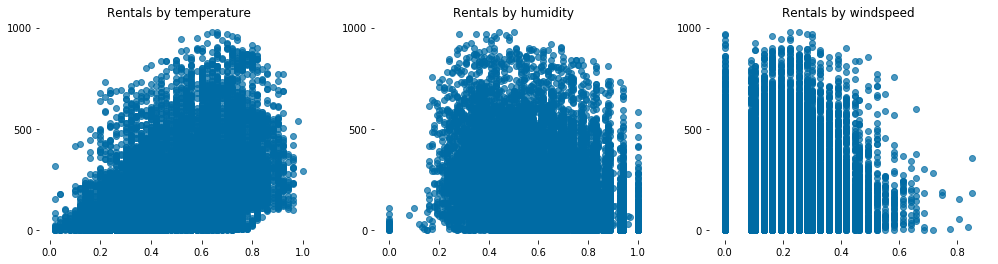

In [53]:
fig2 = plt.figure(figsize=(17,4))
ax = fig2.add_subplot(1,3,1)
ax.scatter(bike_rentals['temp'], bike_rentals['cnt'], color=cb_dark_blue, alpha=0.7)
ax.set_title('Rentals by temperature')

ax1 = fig2.add_subplot(1,3,2)
ax1.scatter(bike_rentals['hum'], bike_rentals['cnt'], color=cb_dark_blue, alpha=0.7)
ax1.set_title('Rentals by humidity')

ax2 = fig2.add_subplot(1,3,3)
ax2.scatter(bike_rentals['windspeed'], bike_rentals['cnt'], color=cb_dark_blue, alpha=0.7)
ax2.set_title('Rentals by windspeed')

for a in [ax,ax1,ax2,ax3]:
    for d in direc:
        a.spines[d].set_visible(False)
    a.set_yticks([0,500,1000])

plt.show()

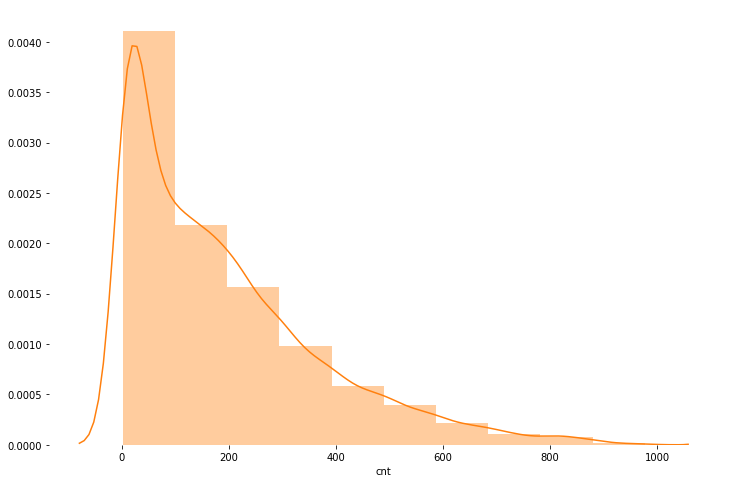

In [58]:
fig3 = plt.figure(figsize=(12,8))
ax = sns.distplot(bike_rentals['cnt'], bins=10, color = cb_orange)
for d in direc:
    ax.spines[d].set_visible(False)
plt.show()

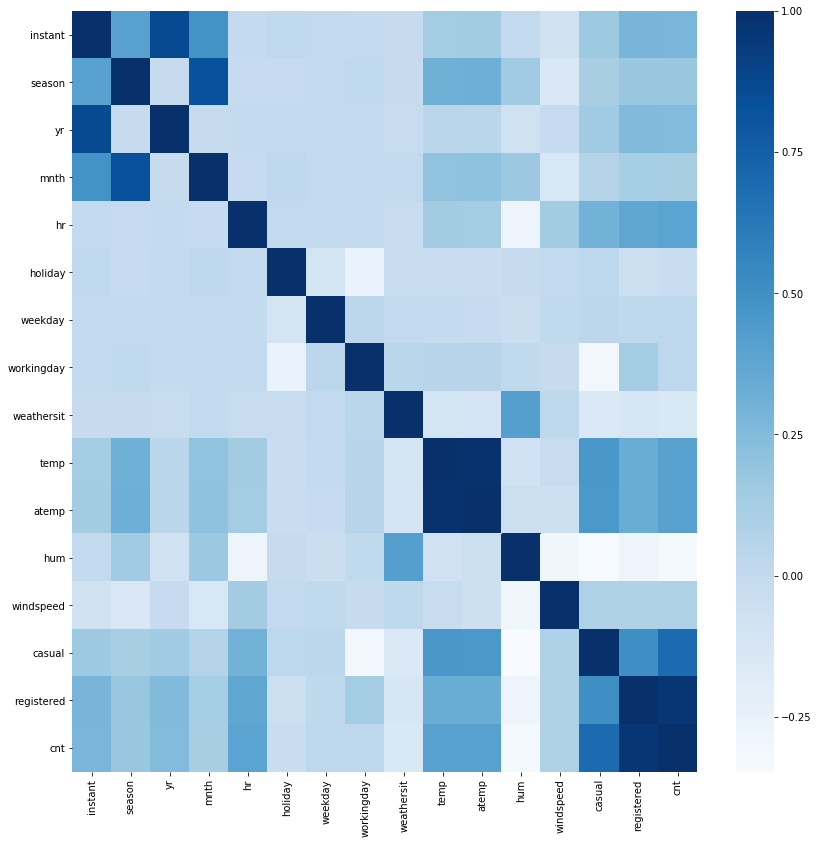

In [65]:
fig4 = plt.figure(figsize=(14,14))
sns.heatmap(bike_rentals.corr(), cmap='Blues')
plt.show()

In [73]:
bike_rentals.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379,0.006705
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056,0.006617
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495,0.004755
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638,0.005786
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071,-0.187486
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927,-0.000702
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900,0.002173
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284,-0.000897
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426,-0.035784
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772,-0.061551


### Feature engineering

It can often be helpful to calculate features before applying machine learning models. Features can enhance the accuracy of models by introducing new information, or distilling existing information.

For example, the hr column in bike_rentals contains the hours during which bikes are rented, from 1 to 24. A machine will treat each hour differently, without understanding that certain hours are related. We can introduce some order into the process by creating a new column with labels for morning, afternoon, evening, and night. This will bundle similar times together, enabling the model to make better decisions.

We'll categorize the **hr** column as follows:

1 if the hour is from 6 to 12

2 if the hour is from 12 to 18

3 if the hour is from 18 to 24

4 if the hour is from 0 to 6

In [68]:
def assign_label(x):
    if x in range(6,12):
        return 1
    elif x in range(12,18):
        return 2
    elif x in range(18,24):
        return 3
    elif x in range(0,6):
        return 4
    
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

### Applying Linear Regression

In [69]:
train = bike_rentals.sample(frac=0.8, axis=0)

In [72]:
test = bike_rentals.drop(train.index, axis=0)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
rmses = {}

lr.fit(train[['temp']], train['cnt'])
predictions1 = lr.predict(test[['temp']])
rmses['temp'] = mean_squared_error(test['cnt'], predictions1)**0.5

lr.fit(train[['temp', 'hr']], train['cnt'])
predictions2 = lr.predict(test[['temp', 'hr']])
rmses['temp_hr'] = mean_squared_error(test['cnt'], predictions2)**0.5

lr.fit(train[['temp', 'hum']], train['cnt'])
predictions3 = lr.predict(test[['temp', 'hum']])
rmses['temp_hum'] = mean_squared_error(test['cnt'], predictions3)**0.5

lr.fit(train[['temp', 'hr', 'hum']], train['cnt'])
predictions4 = lr.predict(test[['temp', 'hr', 'hum']])
rmses['temp_hr_hum'] = mean_squared_error(test['cnt'], predictions4)**0.5

In [89]:
rmses

{'temp': 166.50236484786575,
 'temp_hr': 154.1104258149068,
 'temp_hum': 157.4774105693094,
 'temp_hr_hum': 149.18382277980086}

#### Error
Even the lowest RMSE in the rmses dictionary is pretty high.
This could be because of few extremely high rentals counts in the data

### Decision tree

In [123]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(min_samples_leaf = 10, max_depth = 20)

predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

clf.fit(train[predictors], train['cnt'])

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [127]:
clf_predictions = clf.predict(test[predictors])
err = mean_squared_error(test['cnt'], clf_predictions)**0.5
err

51.92215243828502

In [130]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(min_samples_leaf = 10, max_depth = 20)
rfr.fit(train[predictors], train['cnt'])

C:\Users\Pranab\Miniconda3\envs\datascience\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [132]:
rfr_predictions = rfr.predict(test[predictors])
errr = mean_squared_error(test['cnt'], rfr_predictions)**0.5
errr

46.9452838714994

We saw how the error came down to 52 when we used Decision Trees from 149 when we used Linear Regression.
The error dropped further to 47 when we used Random Forest ensembler